# Multiprocessing

**If you have trouble running `multiprocessing` on your own computer, reach out to me as soon as possible so I can help.**

## Problem 1: Parameter distributions
1. Write a function to generate fake linear data based on an input array of values (something of the format $y=mx+b$) and add noise to your data using `np.random.randn` or `np.random.normal`. Plot your resulting data. Use at least 1000 data points.
2. Use `curve_fit` to fit the data. How well did it recover the parameters of your linear function?
3. Write a function to perform parts 1 and 2 in parallel and run it a bunch of times (at least 10,000) with different random noise on each run, and save the results of the fits. 
4. Make a histogram of all of the resulting slope and $y$ intercept values. What do the resulting distributions look like? What are their means and standard deviations? Why do they have different standard deviations?
5. Do part 3 again but with a different amount of noise added to the data (larger or smaller). How do your distributions of fit parameters change? Why?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import multiprocess as mp

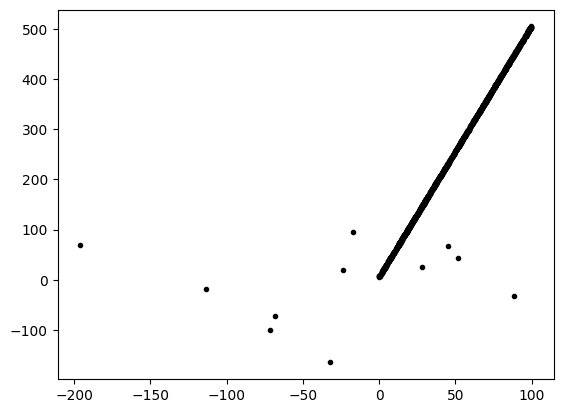

In [5]:
x_data = np.random.random(1000) * 100
y_data = 5*x_data + 6

data = np.vstack((x_data, y_data))
data = data.T
# print(data)

for i in range(11):
    idx = np.random.randint(0, 1000)
    # print(idx)
    data[idx] = np.squeeze(np.random.randn(1, 2)*100)

x = data[:, 0]
y = data[:, 1]
plt.plot(data[:, 0], data[:, 1], 'k.')
plt.show()


This is the graph of the data with noise. This graph is generated from a assigning random values to x and a corresponding y value based on y = mx + b. Then 10 random samples were modified to produce a the output 2D array.

In [6]:
def line(x, m, b):
    return m*x + b

In [7]:
def part_1(m, b, noise):
    x_data = np.random.random(1000) * 100
    y_data = m*x_data + b

    data = np.vstack((x_data, y_data))
    data = data.T

    for _ in range(noise):
        idx = np.random.randint(0, 1000)
        data[idx] = np.squeeze(np.random.randn(1, 2)*100)

    # x = data[:, 0]
    # y = data[:, 1]
    # plt.plot(x, y, 'k.')
    # plt.show()

    return data

def part_2(data):
    x = data[:, 0]
    y = data[:, 1]
    fit, _ = curve_fit(line, x, y)
    # plt.plot(x, y, 'k.')
    # xLine = np.linspace(0, 100, 100)
    # yLine = fit[0]*xLine + fit[1]
    # plt.plot(xLine, yLine, 'r')
    # plt.show()
    
    return fit

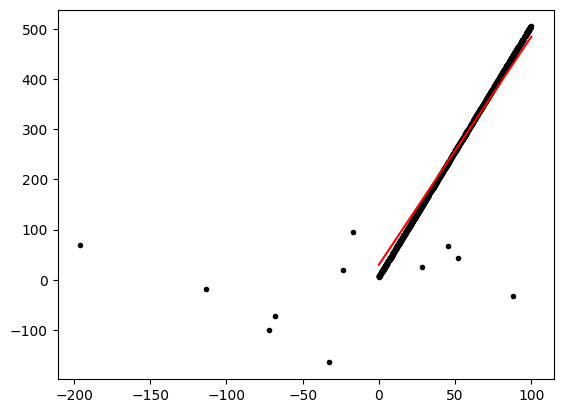

<class 'numpy.ndarray'>


In [8]:
fit, _ = curve_fit(line, x, y)
plt.plot(x, y, 'k.')
xLine = np.linspace(0, 100, 100)
yLine = fit[0]*xLine + fit[1]
plt.plot(xLine, yLine, 'r')
plt.show()

print(type(fit))


The curve fit is able to approximate the actual data quite well since the line is very close to the correct data, regardless the noise in the dataset.

In [9]:
def pool_func(m, b):
    noise = 25
    data = part_1(m, b, noise)
    fit = part_2(data)
    return fit

In [10]:
m = np.full((10000, 1), 3) * 100
b = np.full((10000, 1), 5) * 100
params = list(zip(m, b))
with mp.Pool(5) as p:
    fits = p.starmap(pool_func, params)

print(fits)

[array([ 217.13775383, 4349.23527904]), array([ 210.38103614, 4862.47120259]), array([ 241.29702838, 3515.11082365]), array([ 263.5259008 , 2288.35282276]), array([ 232.46506812, 3798.63599383]), array([ 211.46157306, 4754.10105011]), array([ 239.99402041, 3505.19636525]), array([ 220.75084123, 4229.58448561]), array([ 234.99114093, 3719.10810101]), array([ 224.45592605, 4354.21164441]), array([ 230.67604169, 4057.28638529]), array([ 224.76844186, 4158.99989998]), array([ 224.75425631, 3982.98002324]), array([ 234.19370888, 3655.38420584]), array([ 211.91492761, 4963.70627915]), array([ 233.2146149 , 3719.36886309]), array([ 245.093486  , 3141.97926215]), array([ 227.17997445, 4203.9969105 ]), array([ 246.13670904, 3173.42801836]), array([ 240.17944708, 3413.33268143]), array([ 218.81569003, 4321.89874836]), array([ 248.84395141, 2916.09921164]), array([ 262.47810975, 2168.63666953]), array([ 183.20711058, 6073.14240794]), array([ 251.39221648, 2817.61181673]), array([ 255.46763978, 26

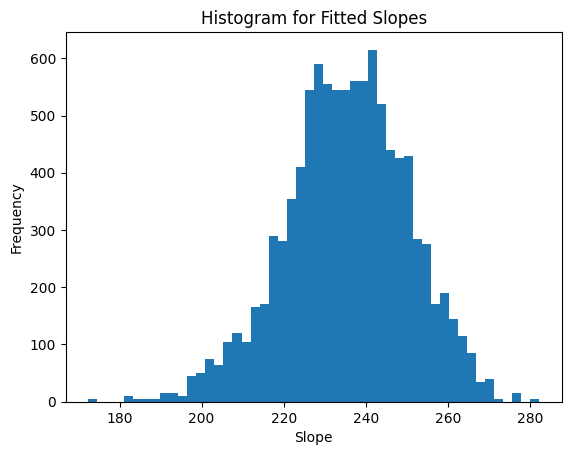

In [11]:
m_fit, b_fit = zip(*fits)
plt.hist(m_fit, bins=50)
plt.title('Histogram for Fitted Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

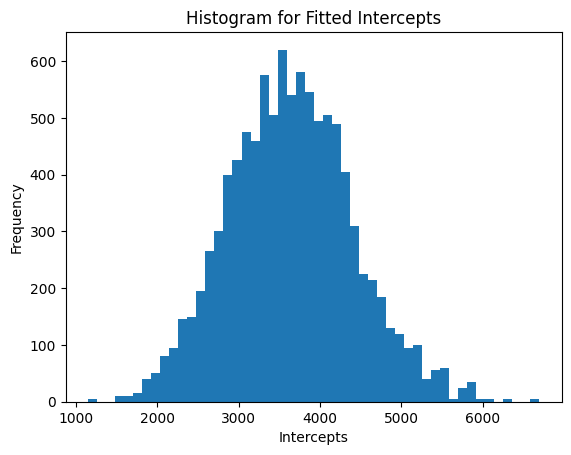

In [12]:
plt.hist(b_fit, bins=50)
plt.title('Histogram for Fitted Intercepts')
plt.xlabel('Intercepts')
plt.ylabel('Frequency')
plt.show()

In [13]:
print(f"Means for intercepts: {np.mean(b_fit): .2f}; Standard Deviation for intercepts: {np.std(b_fit): .2f}")
print(f"Means for slopes: {np.mean(m_fit): .2f}; Standard Deviation for slopes: {np.std(m_fit):.2f}")

Means for intercepts:  3642.55; Standard Deviation for intercepts:  769.98
Means for slopes:  235.36; Standard Deviation for slopes: 15.01


The resulting distributions look bell-shaped. Their means and standard deviations can be seen above. They have different standard deviations because the range of values of the intercepts from the fits is more variable than that of the slopes when finding the regression line.

In [14]:
def pool_func(m, b):
    noise = 40
    data = part_1(m, b, noise)
    fit = part_2(data)
    return fit

In [15]:
m = np.full((10000, 1), 3) * 100
b = np.full((10000, 1), 5) * 100
params = list(zip(m, b))
with mp.Pool(5) as p:
    fits = p.starmap(pool_func, params)

print(fits)

[array([ 187.0481379 , 5736.44231692]), array([ 212.87796985, 4606.32415589]), array([ 215.91873462, 4263.60783025]), array([ 243.65857386, 2861.36751918]), array([ 214.63324454, 4676.67264291]), array([ 203.2690266 , 5202.31860002]), array([ 214.86910229, 4697.34534328]), array([ 215.76559454, 4685.46160516]), array([ 198.80198639, 5418.89082366]), array([ 214.33796588, 4692.48258033]), array([ 215.16365983, 4664.22481967]), array([ 192.18570698, 5745.07574123]), array([ 203.65649184, 4996.0979933 ]), array([ 184.56805299, 5719.98485215]), array([ 205.85218743, 4877.52183992]), array([ 206.59547841, 4878.72781688]), array([ 204.39728501, 5145.26959161]), array([ 203.0512045 , 4857.45302278]), array([ 216.16108423, 4350.94168128]), array([ 186.55755521, 5818.33222109]), array([ 194.58186521, 5332.12502638]), array([ 193.451312  , 5325.65213396]), array([ 206.64582309, 4824.10476036]), array([ 205.46206571, 5064.29436621]), array([ 223.76797668, 4063.06912333]), array([ 201.22956542, 50

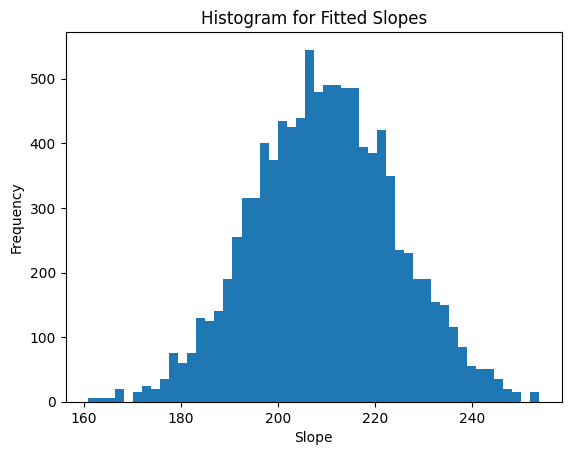

In [16]:
m_fit, b_fit = zip(*fits)
plt.hist(m_fit, bins=50)
plt.title('Histogram for Fitted Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

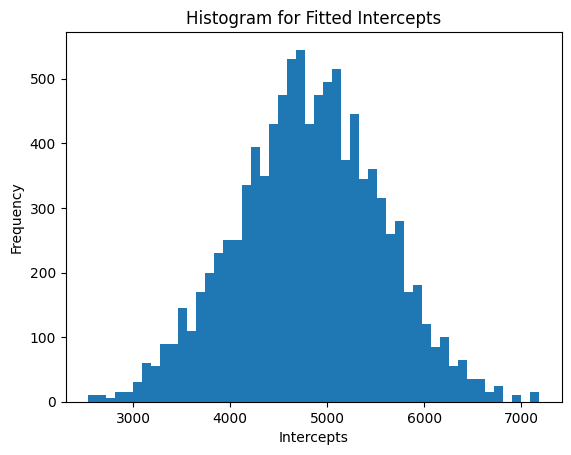

In [17]:
plt.hist(b_fit, bins=50)
plt.title('Histogram for Fitted Intercepts')
plt.xlabel('Intercepts')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(f"Means for intercepts: {np.mean(b_fit): .2f}; Standard Deviation for intercepts: {np.std(b_fit): .2f}")
print(f"Means for slopes: {np.mean(m_fit): .2f}; Standard Deviation for slopes: {np.std(m_fit):.2f}")

Means for intercepts:  4814.44; Standard Deviation for intercepts:  745.23
Means for slopes:  209.71; Standard Deviation for slopes: 14.70


The means of the intercepts get bigger and the means of the slopes get smaller. The standard deviation stays the same however. This is because I increased the noise. Thus, the intercepts could have been easily adjusted to fit the data. Same for the slopes. The spread of the different variables stay approximately the same however since the change in the amount of noise does not really impact the spread of the slopes and intercepts.

## Problem 2: Bootstrapping
As I often say, it's not science unless you have error bars, and that includes reporting errors on means. The standard statistical way to calculate the error on the mean for a distribution is $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation and $n$ is the total number of data points.

In some cases (particularly ones where the distribution of points can't be described easily by a normal Gaussian distribution), a technique called bootstrapping is used to empirically approximate the error on the mean instead. To bootstrap an error, you randomly sample from the original data set to create a new fake data set that follows approximately the same distribution as the original data set but with a bit of random variation in it. This is called a "bootstrapped" data set. 

In practice, this can be done with the `np.random.choice` function, which randomly chooses values from an array that you feed it. To create a bootstrapped data set, you'll want the size to be the same as the input data set and you'll want it to sample *with* replacement (meaning it is allowed to choose the same value twice).

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

Once you have a bootstrapped data set, you can calculate its mean. Then you can make a lot more bootstrapped data sets and calculate their means. In the end, you should get a distribution of means of bootstrapped data sets, and the standard deviation of those means is approximately the error on the mean. 

So to recap, first create a new data set of the same size with `np.random.choice`, then calculate its mean, then do that a bunch of times, then calculate the standard deviation of all of the means.

1. Load `m67.csv` again and get use code from HW 4 to isolate just the stars in the cluster itself.
2. What is the mean parallax of cluster stars? What is the standard deviation?
3. Calculate the error on the mean you reported above using the standard statistical method above.
4. Create a bootstrapped data set of the parallaxes using the method described above. What is its mean?
5. Using parallelization, create a bunch of other bootstrapped data sets (at least 10,000) and calculate their means. What is the standard deviation of the distribution of bootstrapped means? How does it compare to the error on the mean you calcualted in part 3?

In [19]:
m67 = np.genfromtxt('m67.csv', names=True, dtype=None, encoding='UTF-8', delimiter=',')

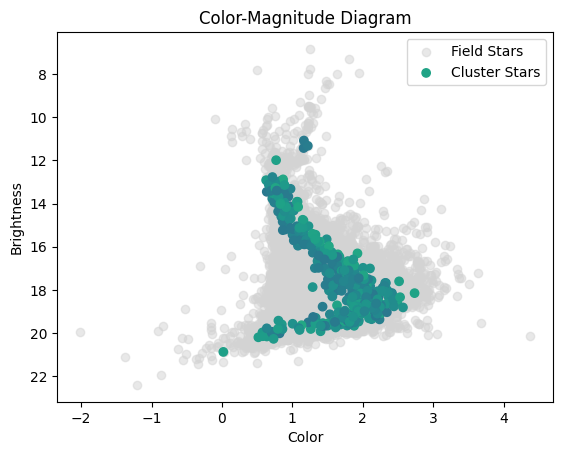

Mean parallax of cluster stars: 0.974
Standard deviation of parallax: 0.113
Error: 0.006
Bootstrapped mean parallax: 0.968


In [36]:
def get_cluster_stars(m67):
    return m67[(m67['parallax'] > 0.8) & (m67['parallax'] < 1.2) & (np.sqrt(m67['pmra']**2 + m67['pmdec']**2) < 10)]

def plot_diagram(m67, cluster):
    plt.scatter(m67['bp_rp'], m67['phot_rp_mean_mag'], color='lightgray', alpha=0.5, label='Field Stars')
    plt.scatter(cluster['bp_rp'], cluster['phot_rp_mean_mag'], c=cluster['parallax'], vmin=0, vmax=2, label='Cluster Stars')
    plt.gca().invert_yaxis()
    plt.title('Color-Magnitude Diagram')
    plt.xlabel('Color')
    plt.ylabel('Brightness')
    plt.legend()
    plt.show()

cluster = get_cluster_stars(m67)
plot_diagram(m67, cluster)

mean_parallax = np.mean(cluster['parallax'])
std_parallax = np.std(cluster['parallax'])

print(f"Mean parallax of cluster stars: {mean_parallax:.3f}")
print(f"Standard deviation of parallax: {std_parallax:.3f}")
print(f"Error: {std_parallax / np.sqrt(len(cluster)):.3f}")

np.random.seed(0)
bstr_parallax = np.random.choice(cluster['parallax'], size=len(cluster), replace=True)
mean_bstr_parallax = np.mean(bstr_parallax)

print(f"Bootstrapped mean parallax: {mean_bstr_parallax:.3f}")

I started by accessing just the cluster stars using the `get_cluster_star` function. I also created another function `plot_diagram` to plot the cluster on a pyplot using matplotlib. Afterwards, I calculated the mean and standard deviation of the parallax values of the cluster. The bootstrap sample of the parallax was then generated using `random.choice` method in numpy. And I then calculated the mean of the parallax in the bootstrap parallaxes.

In [37]:
def bootstrap_mean(data, idx):
    np.random.seed(idx) 
    sampled_data = np.random.choice(data, size=len(data), replace=True)
    return np.mean(sampled_data)

In [38]:
with mp.Pool(mp.cpu_count()) as pool:
    bootstrap_means = pool.starmap(bootstrap_mean, [(cluster['parallax'], index) for index in range(10000)])

mean_bootstrapped_means = np.mean(bootstrap_means)
std_bootstrapped_means = np.std(bootstrap_means)


print(f"Mean of bootstrap means: {mean_bootstrapped_means:.3f}")
print(f"Standard deviation: {std_bootstrapped_means: .3f}")


Mean of bootstrap means: 0.974
Standard deviation:  0.006


Using the multiprocess library, I then calculated the means of 10000 boostrap samples of the data. The mean and standard deviations of the list of bootstraps means was then calculated. The standard deviation is equal to the error in Part 3.